# Load Dataset

In [1]:
from lib import FFNN
from lib import matrix as Matrix
from lib import activation as Activation
from lib import loss as Loss
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
from sklearn.preprocessing import OneHotEncoder

# Load data from OpenML
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train = OneHotEncoder(sparse_output=False).fit_transform(y_train.reshape(-1, 1))
y_val = OneHotEncoder(sparse_output=False).fit_transform(y_val.reshape(-1, 1))

# Train sklearn MLP

In [21]:
from sklearn.neural_network import MLPClassifier

# Define and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation="tanh", solver="adam", alpha=0.0001,
                    learning_rate="constant", learning_rate_init=0.001, batch_size=32, max_iter=15, random_state=42, verbose=True)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.15235224
Iteration 2, loss = 0.78783316
Iteration 3, loss = 0.70354855
Iteration 4, loss = 0.67189588
Iteration 5, loss = 0.64780021
Iteration 6, loss = 0.63269421
Iteration 7, loss = 0.59001100
Iteration 8, loss = 0.57485053
Iteration 9, loss = 0.53874835
Iteration 10, loss = 0.52509403
Iteration 11, loss = 0.50237153
Iteration 12, loss = 0.49755271
Iteration 13, loss = 0.51822235
Iteration 14, loss = 0.50488802
Iteration 15, loss = 0.45732488


/home/trimonuter/Documents/Kuliah/VI_Kuliah/Pembelarajan Mesin [IF3270]/ML_Tubes1/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=(128, 64),
              max_iter=15, random_state=42, verbose=True)

In [22]:
from sklearn.metrics import accuracy_score

mlp_pred = mlp.predict(X_val)
val_acc = accuracy_score(y_val, mlp_pred)

print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8866


Accuracy: 85.00%


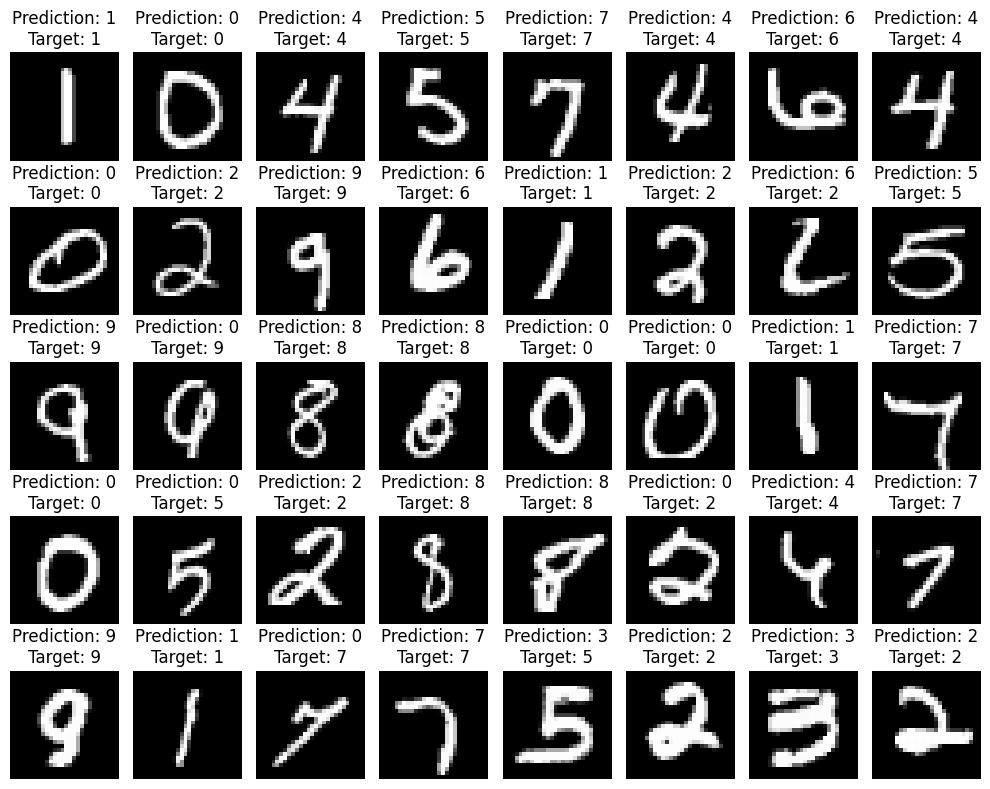

In [ ]:
# Reshape X_val back to 28x28 images for visualization
X_images = X_val.reshape(-1, 28, 28)

mlp_pred_digits = np.argmax(mlp_pred, axis=1)
y_val_digits = np.argmax(y_val, axis=1)

# Plot some images with predictions
rows = 5
cols = 8
n = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.ravel()

correct = 0
for i in range(n):
    # Generate random number
    idx = np.random.randint(0, X_val.shape[0])

    axes[i].imshow(X_images[idx], cmap="gray")
    axes[i].set_title(f"Prediction: {mlp_pred_digits[idx]}\nTarget: {y_val_digits[idx]}")
    axes[i].axis("off")

    if mlp_pred_digits[idx] == y_val_digits[idx]:
        correct += 1

print(f"Accuracy: {correct/n*100:.2f}%")
plt.tight_layout()
plt.show()

# Train FFNN model

In [24]:
ffnn = FFNN.FFNN([784, 128, 64, 10], X_train, y_train, X_val, y_val, 0.001)
ffnn.setActivationUniform(Activation.tanh)
ffnn.initializeWeightRandomUniform(-1, 1)

ffnn.train(batch_size=32, learning_rate=ffnn.learning_rate, epochs=15)

 [Epoch 1]:	Training Loss: 0.04153208925474616	Validation Loss: 0.36585751632337127	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.01069580995289981	Validation Loss: 0.3138674176204599	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.009672020316529343	Validation Loss: 0.29890647252974206	Progress: [████                ]
 [Epoch 4]:	Training Loss: 0.00944156964299673	Validation Loss: 0.29557459854917967	Progress: [█████               ]
 [Epoch 5]:	Training Loss: 0.009177851734838975	Validation Loss: 0.2888821361910658	Progress: [██████              ]
 [Epoch 6]:	Training Loss: 0.00915272394831995	Validation Loss: 0.29329261035531823	Progress: [████████            ]
 [Epoch 7]:	Training Loss: 0.009125407553877005	Validation Loss: 0.29308465894787783	Progress: [█████████           ]
 [Epoch 8]:	Training Loss: 0.009053476693343523	Validation Loss: 0.28452895418537283	Progress: [██████████          ]
 [Epoch 9]:	Training Loss: 0.008780644524085918	Validation Los

([np.float64(0.04153208925474616),
  np.float64(0.01069580995289981),
  np.float64(0.009672020316529343),
  np.float64(0.00944156964299673),
  np.float64(0.009177851734838975),
  np.float64(0.00915272394831995),
  np.float64(0.009125407553877005),
  np.float64(0.009053476693343523),
  np.float64(0.008780644524085918),
  np.float64(0.008621180237591529),
  np.float64(0.008502222366709262),
  np.float64(0.00857013117207851),
  np.float64(0.008560552172567806),
  np.float64(0.008495007820569358),
  np.float64(0.008240247974864416)],
 [np.float64(0.36585751632337127),
  np.float64(0.3138674176204599),
  np.float64(0.29890647252974206),
  np.float64(0.29557459854917967),
  np.float64(0.2888821361910658),
  np.float64(0.29329261035531823),
  np.float64(0.29308465894787783),
  np.float64(0.28452895418537283),
  np.float64(0.2766864376802365),
  np.float64(0.2725939534608868),
  np.float64(0.26956103414597704),
  np.float64(0.2688167444288439),
  np.float64(0.268665339704123),
  np.float64(0.2

In [72]:
relu = FFNN.FFNN.load("models/relu_model")
relu_pred = relu.FFNNForwardPropagation(X_val)

Successfuly loaded 'models/relu_model'


In [28]:
base = FFNN.FFNN.load("models/base_model")
base_pred = base.FFNNForwardPropagation(X_val)

Successfuly loaded 'models/base_model'


In [69]:
linear = FFNN.FFNN.load("models/linear_model")
linear_pred = linear.FFNNForwardPropagation(X_val)

Successfuly loaded 'models/linear_model'


Accuracy: 93.00%


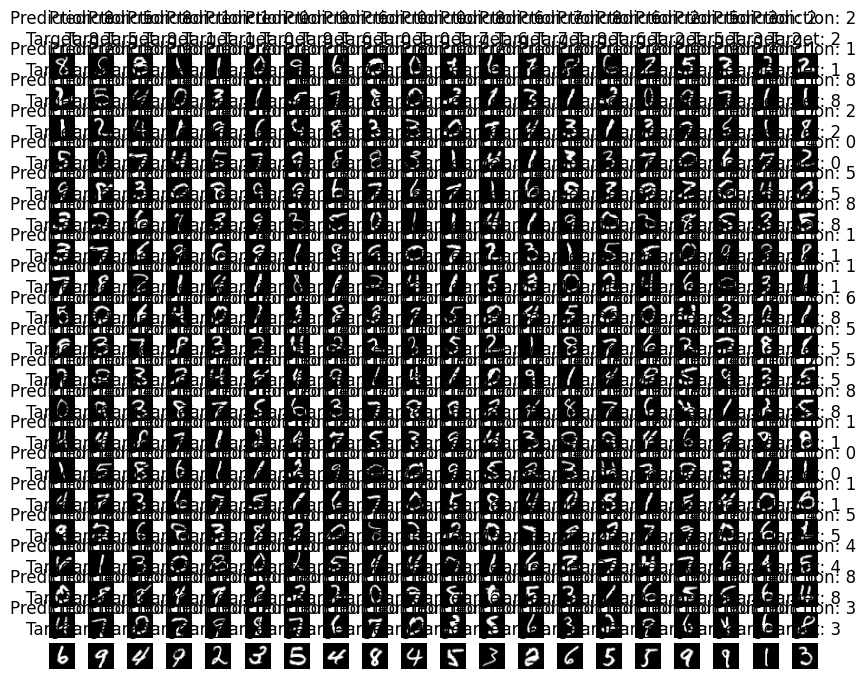

In [73]:
# Reshape X_val back to 28x28 images for visualization
X_images = X_val.reshape(-1, 28, 28)

ffnn_pred_digits = np.argmax(relu_pred, axis=1)
y_val_digits = np.argmax(y_val, axis=1)

# Plot some images with predictions
rows = 20
cols = 20
n = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.ravel()

correct = 0
for i in range(n):
    # Generate random number
    idx = np.random.randint(0, X_val.shape[0])

    axes[i].imshow(X_images[idx], cmap="gray")
    axes[i].set_title(f"Prediction: {ffnn_pred_digits[idx]}\nTarget: {y_val_digits[idx]}")
    axes[i].axis("off")

    if ffnn_pred_digits[idx] == y_val_digits[idx]:
        correct += 1

print(f"Accuracy: {correct/n*100:.2f}%")
# plt.tight_layout()
# plt.show()